# Всем привет, я Лиза и это мой супер-пупер курсач по машинке

## Импорт необходимых библиотек и данных

Импорт библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Загрузка файла

In [ ]:
from google.colab import files
files.upload()

Перевод файла json в DataFrame

In [ ]:
my_json = pd.read_json('data.json')

## Анализ данных

Посмотрим на полученный датасет. Он содержит 3 колонки:
id блюда - в данном случае неинформативная колонка.
Название кухни, из которой исходит блюдо - наша целевая переменная.
Ингредиенты, из которых состоит блюдо - данные в формате списка

In [ ]:
my_json

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


Проверка на тип данных

In [ ]:
type(my_json['ingredients'][5])

list

Узнаем количество столбцов и строк в нашем датасете

In [ ]:
shape = my_json.shape
shape

(39774, 3)

Взглянем на популярность разных кухонь в имеющемся датасете

In [ ]:
value_counts = my_json['cuisine'].value_counts()

In [ ]:
value_counts

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

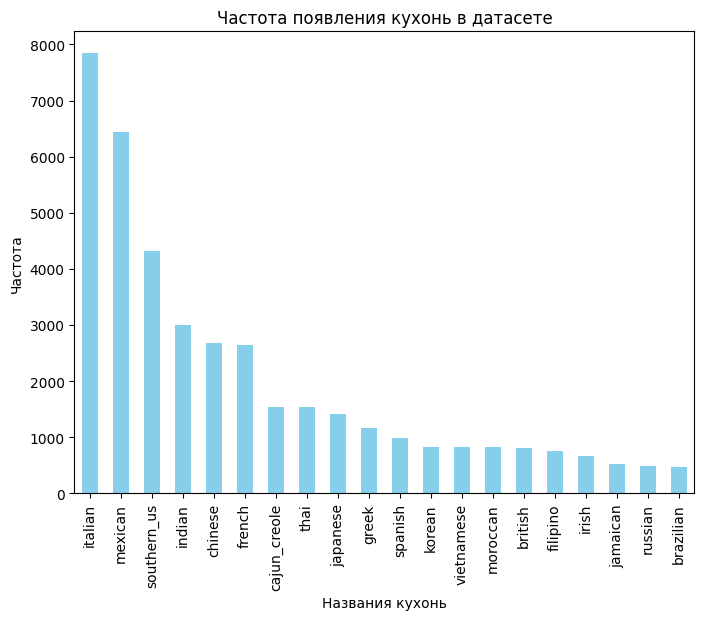

In [ ]:
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Частота появления кухонь в датасете')
plt.xlabel('Названия кухонь')
plt.ylabel('Частота')
plt.show()

Посмотрим, какие ингредиенты являются самыми популярными для каждой кухни

In [ ]:
dict_of_cuisines = {cuisine_name:dict() for cuisine_name in value_counts.index}

In [ ]:
for i in range(shape[0]):
  current_cuisine = my_json['cuisine'][i]
  current_ingredients = my_json['ingredients'][i]
  for ingredient in current_ingredients:
    if ingredient in dict_of_cuisines[current_cuisine].keys():
      dict_of_cuisines[current_cuisine][ingredient] += 1
    else:
      dict_of_cuisines[current_cuisine][ingredient] = 1


In [ ]:
dict_of_cuisines['italian']

{'sugar': 760,
 'pistachio nuts': 7,
 'white almond bark': 1,
 'flour': 142,
 'vanilla extract': 219,
 'olive oil': 3111,
 'almond extract': 56,
 'eggs': 627,
 'baking powder': 186,
 'dried cranberries': 8,
 'chopped tomatoes': 37,
 'fresh basil': 787,
 'garlic': 1471,
 'extra-virgin olive oil': 1362,
 'kosher salt': 656,
 'flat leaf parsley': 588,
 'pimentos': 16,
 'sweet pepper': 7,
 'dried oregano': 626,
 'sharp cheddar cheese': 9,
 'pepper': 965,
 'swiss cheese': 7,
 'provolone cheese': 138,
 'canola oil': 41,
 'mushrooms': 184,
 'black olives': 67,
 'sausages': 58,
 'Italian parsley leaves': 74,
 'walnuts': 38,
 'hot red pepper flakes': 76,
 'fresh lemon juice': 471,
 'trout fillet': 3,
 'garlic cloves': 1619,
 'chipotle chile': 2,
 'fine sea salt': 77,
 'fresh parmesan cheese': 251,
 'butter': 1030,
 'all-purpose flour': 918,
 'fat free less sodium chicken broth': 158,
 'chopped fresh chives': 68,
 'gruyere cheese': 18,
 'ground black pepper': 1444,
 'bacon slices': 48,
 'gnocchi

Посмотрим на 10 самых популярных ингредиентов в каждой кухне

In [ ]:
def take_n_most_popular_ingredients(cuisine, n):
  return dict(sorted(cuisine.items(), key=lambda item: item[1], reverse=True)[:n])

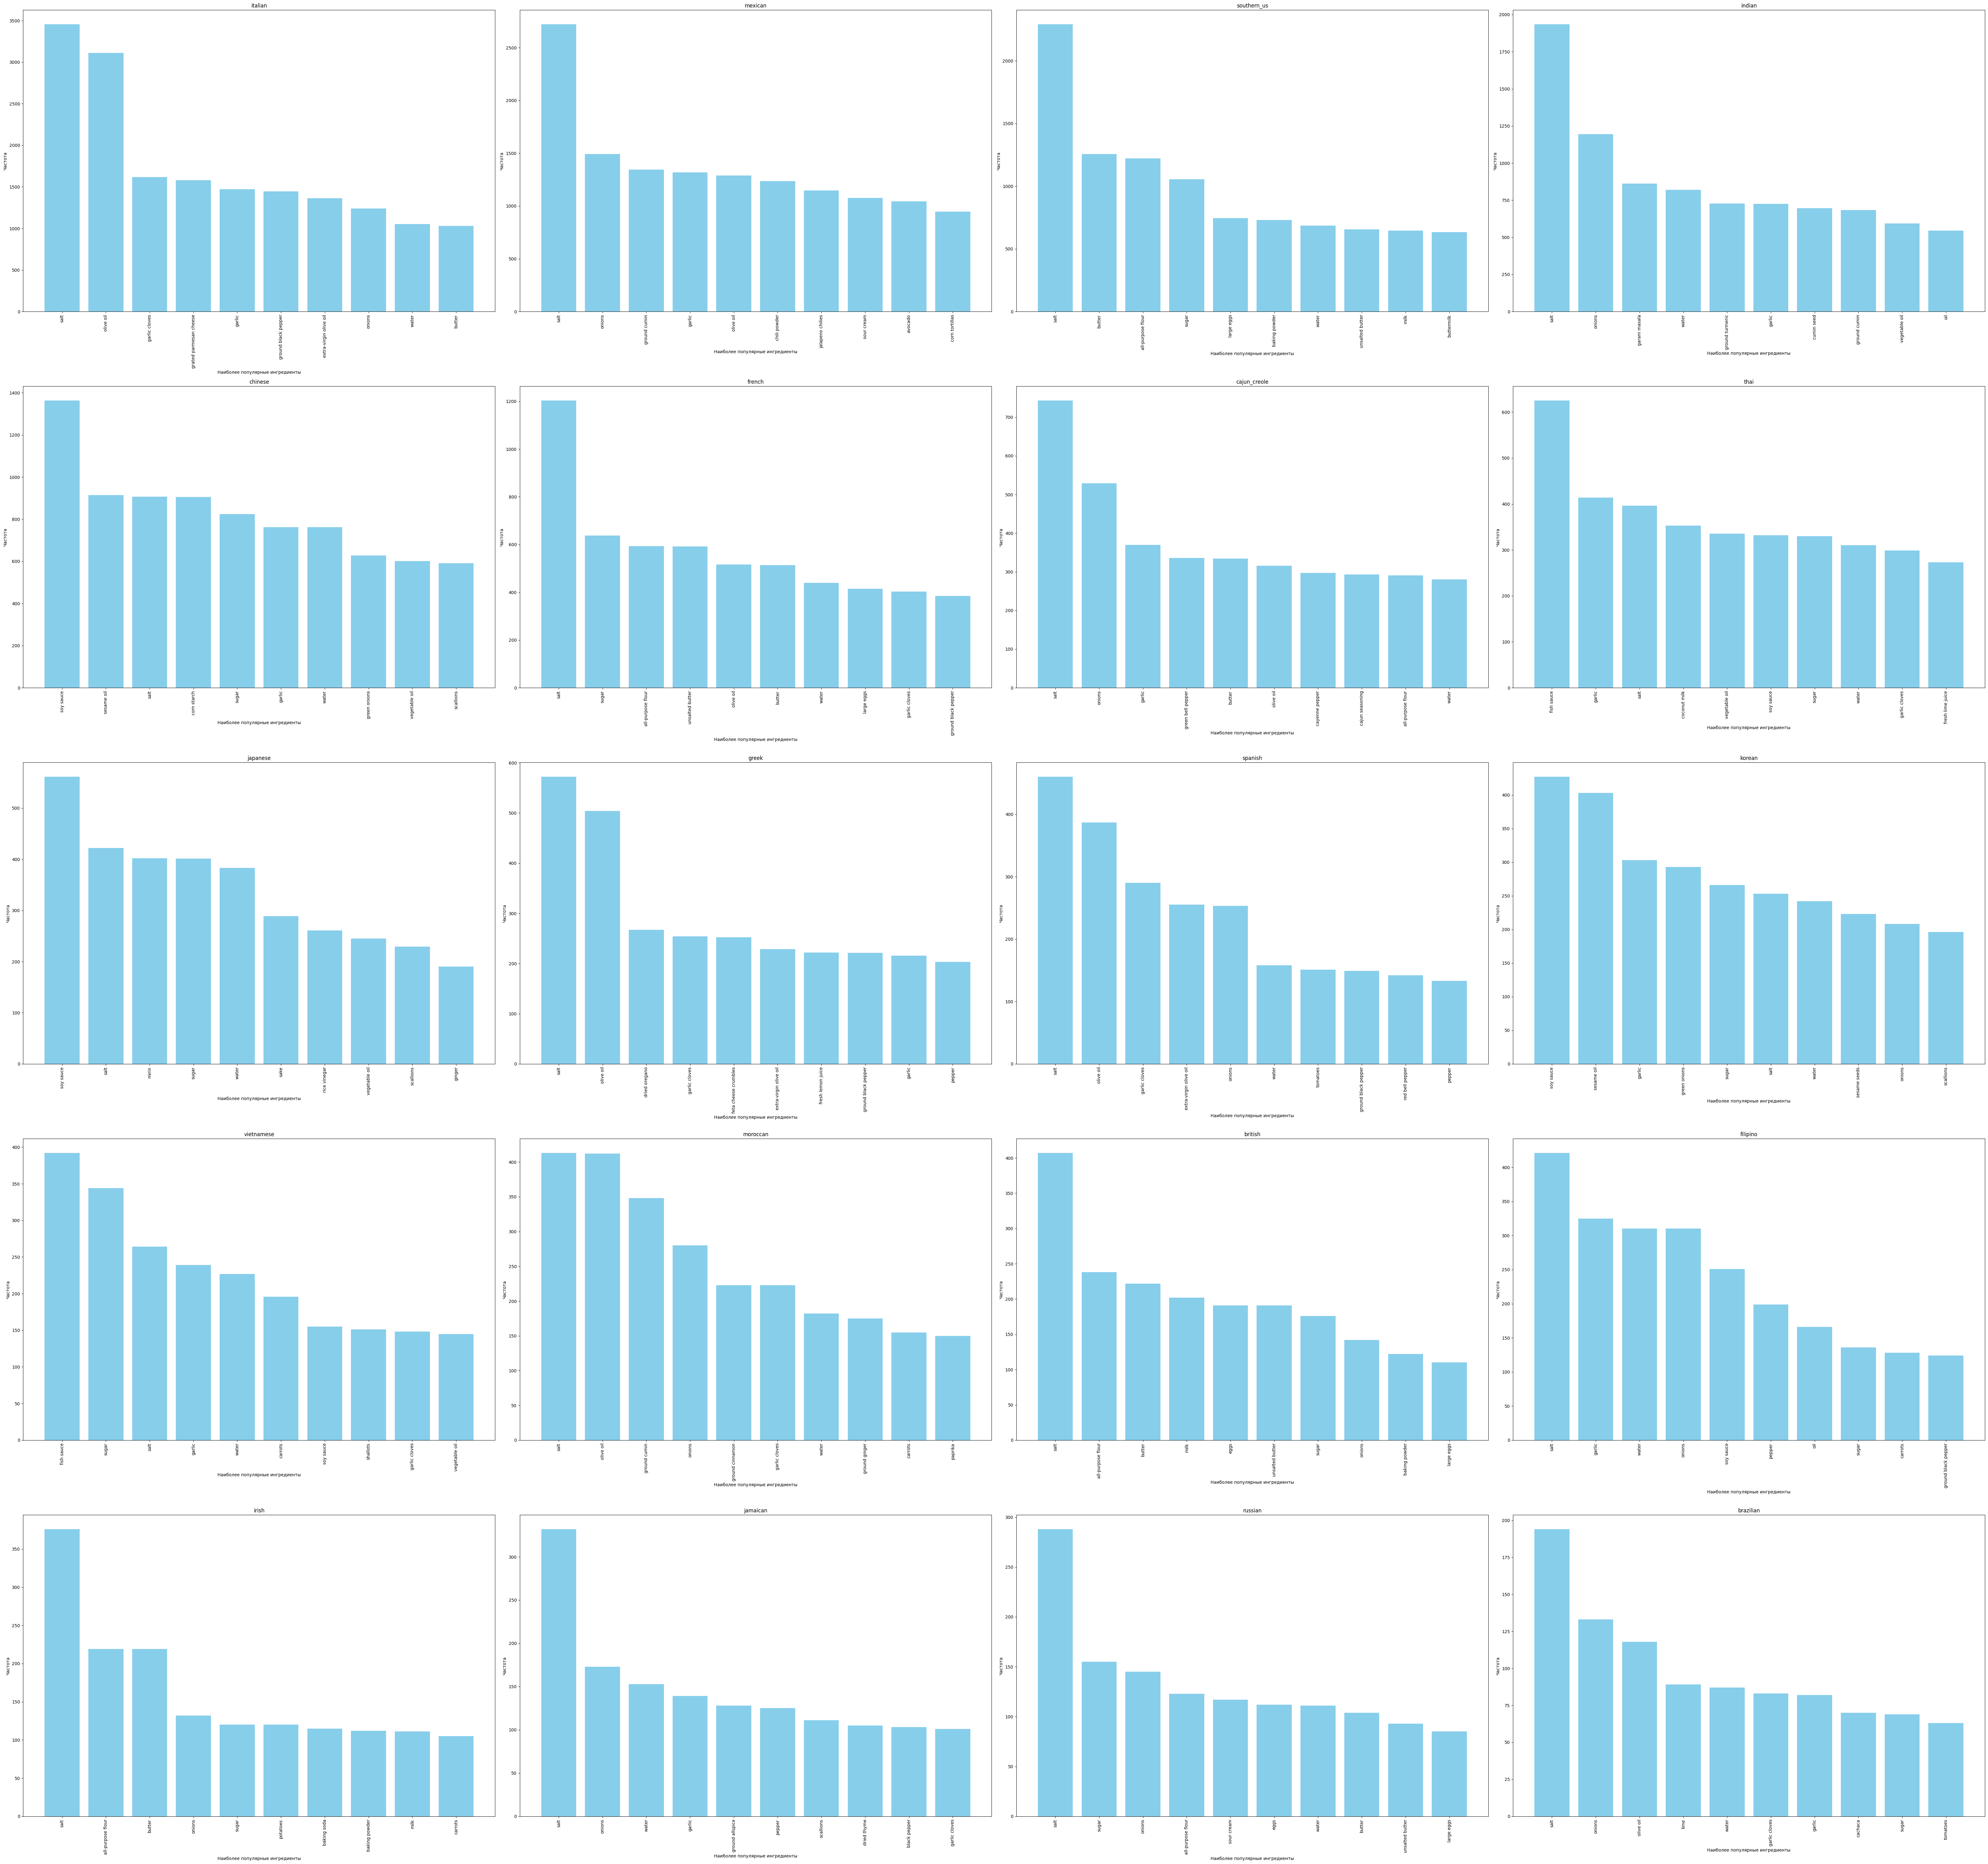

In [ ]:
data = {cuisine:take_n_most_popular_ingredients(dict_of_cuisines[cuisine], 10) for cuisine in dict_of_cuisines}

fig, axs = plt.subplots(5, 4, figsize=(64, 60))

keys = list(data.keys())

for i in range(5):
    for j in range(4):
        if keys:
            key = keys.pop(0)
            value = data[key]
            current_keys = list(value.keys())
            current_values = list(value.values())
            axs[i, j].bar(current_keys, current_values, color='skyblue')
            axs[i, j].set_title(key)
            axs[i, j].set_xlabel('Наиболее популярные ингредиенты')
            axs[i, j].set_ylabel('Частота')
            axs[i, j].tick_params(axis='x', labelrotation=90)


plt.tight_layout()
plt.show()

Как видно, в большинстве кухонь самым популярным ингредиентом является соль. Санкт-Петербургу респект

## Перевод данных в новый формат

Несмотря на проделанный анализ, непонятно, как подступиться к задаче с имеющимися данными

Чтобы прийти к классической задаче машинного обучения, где у каждого объекта одинаковое число признаков, воспользуемся методом One-Hot-Encoding

В данном случае мы соберём датасет, столбцами которого будут ингредиенты и целевая метка(кухня), и для каждого блюда значения в столбцах будут равны 0 или 1 (1, если ингредиент применяется в блюде, и 0, если нет)

In [ ]:
set_of_ingredients = set()
for i in range(shape[0]):
  set_of_ingredients |= set(my_json['ingredients'][i])

In [ ]:
count_of_ingredients = len(set_of_ingredients)
count_of_ingredients

6714

In [ ]:
list_of_ingredients = list(set_of_ingredients)
data = {name_of_ingredient:[] for name_of_ingredient in (list_of_ingredients + ['cuisine'])}
for i in range(shape[0]):
  for j in list_of_ingredients:
    data[j].append(1 if j in my_json['ingredients'][i] else 0)
  data['cuisine'].append(my_json['cuisine'][i])
  if i % 1000 == 0:
    print(f'{i}/{shape[0]} complited')

0/39774 complited
1000/39774 complited
2000/39774 complited
3000/39774 complited
4000/39774 complited
5000/39774 complited
6000/39774 complited
7000/39774 complited
8000/39774 complited
9000/39774 complited
10000/39774 complited
11000/39774 complited
12000/39774 complited
13000/39774 complited
14000/39774 complited
15000/39774 complited
16000/39774 complited
17000/39774 complited
18000/39774 complited
19000/39774 complited
20000/39774 complited
21000/39774 complited
22000/39774 complited
23000/39774 complited
24000/39774 complited
25000/39774 complited
26000/39774 complited
27000/39774 complited
28000/39774 complited
29000/39774 complited
30000/39774 complited
31000/39774 complited
32000/39774 complited
33000/39774 complited
34000/39774 complited
35000/39774 complited
36000/39774 complited
37000/39774 complited
38000/39774 complited
39000/39774 complited


In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,cream ic peach,straight bourbon whiskey,rice powder,spinach leaves,homemade vegetable stock,tortillas,morsels,unsweetened vanilla almond milk,vegetable soup,beef round,...,sea cucumber,hot sausage,green pumpkin seeds,Swerve Sweetener,Crystal Farms Reduced Fat Shredded Marble Jack Cheese,corn kernels,cuttlefish balls,sliced green onions,mixed seafood,cuisine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,greek
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,southern_us
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,filipino
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,indian
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,irish
39770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,italian
39771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,irish
39772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,chinese


## Применение модели машинного обучения

И теперь, когда мы привели датасет к удобному виду, можно делать предсказания с помощью модели машинного обучения

Отделим признаки и целевую переменную, после чего разделим данные на обучающую и тестовую выборку в пропорции 7/3

In [ ]:
X = df[list_of_ingredients]
y = df['cuisine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Воспользуемся простой, и в то же время достаточно эффективной моделью для решения задачи классификации - логистической регрессией

In [ ]:
logreg = LogisticRegression()

Обучим модель на имеющихся у нас обучающих данных

In [ ]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Сделаем предсказания модели по тестовым признаковым описаниям объектов

In [ ]:
predictions = logreg.predict(X_test)
predictions

array(['chinese', 'spanish', 'greek', ..., 'indian', 'french', 'mexican'],
      dtype=object)

Сравним предсказания модели с настоящими метками классов

In [ ]:
accuracy = logreg.score(X_test, y_test)
print(f"Точность модели: {accuracy}")

Точность модели: 0.775412721025727


Как видно, точность модели достаточно неплоха, поэтому поставьте зачетик, пожалуйста...